In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import MoS2_data_cleaning as mo
import find_SS as fs
import os
import re
import numpy as np
from scipy.ndimage import gaussian_filter1d



Run the first cell to initial the notebook. Edit the directory path in the next cell. The third last cell is for sorting and saving `csv` files for origin. The second last and last cell are for SS calculation. 

In [2]:
directory_path = "C:\\Users\\sophi\\Box\\MoS2Project\\2025-10-22-CVD\\DoubleGate\\IdVtg"  # Replace with your directory path
if not os.path.isdir(f'{directory_path}\sorted'):
    os.mkdir(f'{directory_path}\sorted')
file_list = []
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path):
        file_list.append(file_path)

In [3]:
# filename = 'C:\\Users\\sophi\\Box\\MoS2Project\\2025-10-16-CVD-IdVtg\\R10C8-T__ExfoliatedMoS2_TGIdVg.csv'
filename = file_list[0]
df  = pd.read_csv(filename, skiprows=256)
df.drop(df.columns[0], axis=1, inplace=True)

Vbg = df.iloc[1, 2]
df.drop(columns=[' Vbg', ' IS'], inplace=True)




df.head()


,VTG,VD,ID,ITG,Ibg
0,-1.500,0.1,1.576000e-11,-9.982520e-08,
1,-1.485,0.1,-1.500000e-11,-7.620600e-08,
2,-1.470,0.1,-1.521000e-11,-5.824480e-08,
3,-1.455,0.1,-1.448000e-11,-4.446680e-08,
4,-1.440,0.1,-1.333000e-11,-3.402080e-08,


In [4]:
df[' forward'] = True

df.loc[(df.index >= 201) & (df.index <= 401), ' forward'] = False
df.loc[(df.index >= 603) & (df.index <= 803), ' forward'] = False
df.loc[(df.index >= 1005) & (df.index <= 1205), ' forward'] = False
df.loc[(df.index >= 1407) & (df.index <= 1607), ' forward'] = False

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

        VTG   VD            ID           ITG Ibg  forward
0    -1.500  0.1  1.576000e-11 -9.982520e-08         True
1    -1.485  0.1 -1.500000e-11 -7.620600e-08         True
2    -1.470  0.1 -1.521000e-11 -5.824480e-08         True
3    -1.455  0.1 -1.448000e-11 -4.446680e-08         True
4    -1.440  0.1 -1.333000e-11 -3.402080e-08         True
5    -1.425  0.1 -1.296000e-11 -2.604100e-08         True
6    -1.410  0.1 -1.294000e-11 -1.990800e-08         True
7    -1.395  0.1 -1.289000e-11 -1.524820e-08         True
8    -1.380  0.1 -1.341000e-11 -1.167960e-08         True
9    -1.365  0.1 -1.353000e-11 -8.818400e-09         True
10   -1.350  0.1  6.060000e-12 -6.757700e-09         True
11   -1.335  0.1  1.510000e-12 -5.137400e-09         True
12   -1.320  0.1  5.630000e-12 -3.932000e-09         True
13   -1.305  0.1  4.710000e-12 -3.027400e-09         True
14   -1.290  0.1  6.370000e-12 -2.331900e-09         True
15   -1.275  0.1  6.500000e-12 -1.778000e-09         True
16   -1.260  0

In [5]:
df_new = pd.pivot_table(df,columns=' VD',values=[' ID',' ITG'],index=[' VTG',' forward'])
df_new.columns

# df_sorted.to_csv('IdVd_sorted.csv', index=True)

MultiIndex([( ' ID', 0.1),
            ( ' ID', 0.4),
            ( ' ID', 0.7),
            ( ' ID', 1.0),
            (' ITG', 0.1),
            (' ITG', 0.4),
            (' ITG', 0.7),
            (' ITG', 1.0)],
           names=[None, ' VD'])

In [6]:
df_sorted = df_new.sort_values(by=[' forward',' VTG'])
df_sorted

ID                                            \
 VD                       0.1           0.4           0.7           1.0   
 VTG    forward                                                           
-1.500 False     2.994000e-11  2.939000e-11  2.834000e-11  2.897000e-11   
-1.485 False     2.935000e-11  2.866000e-11  2.761000e-11  2.807000e-11   
-1.470 False     2.824000e-11  2.801000e-11  2.754000e-11  2.662000e-11   
-1.455 False     2.714000e-11  2.691000e-11  2.726000e-11  2.596000e-11   
-1.440 False     2.687000e-11  2.713000e-11  2.586000e-11  2.539000e-11   
...                       ...           ...           ...           ...   
 1.440 True      4.935080e-08  2.571200e-07  5.340200e-07  8.238200e-07   
 1.455 True      5.068220e-08  2.604400e-07  5.475200e-07  8.512800e-07   
 1.470 True      5.265320e-08  2.677400e-07  5.596000e-07  8.717000e-07   
 1.485 True      5.318180e-08  2.777000e-07  5.659800e-07  8.986400e-07   
 1.500 True      5.616600e-08  2.852800e-07  5.887200e-07  9.052000e-07   

                          ITG                                            
 VD                       0.1           0.4           0.7           1.0  
 VTG    forward                                                          
-1.500 False    -1.002032e-07 -1.004120e-07 -1.005652e-07 -1.006690e-07  
-1.485 False    -7.650180e-08 -7.665480e-08 -7.676400e-08 -7.684820e-08  
-1.470 False    -5.846280e-08 -5.858460e-08 -5.866740e-08 -5.873280e-08  
-1.455 False    -4.464500e-08 -4.473080e-08 -4.479800e-08 -4.485140e-08  
-1.440 False    -3.415880e-08 -3.422640e-08 -3.427780e-08 -3.431300e-08  
...                       ...           ...           ...           ...  
 1.440 True      4.799740e-08  4.755420e-08  4.753620e-08  4.740260e-08  
 1.455 True      6.064640e-08  6.007960e-08  6.008460e-08  5.997400e-08  
 1.470 True      7.642760e-08  7.634260e-08  7.604180e-08  7.610900e-08  
 1.485 True      9.685780e-08  9.714020e-08  9.647660e-08  9.650120e-08  
 1.500 True      1.247000e-07  1.236000e-07  1.228200e-07  1.227400e-07  

[402 rows x 8 columns]

In [7]:
midpoint = len(df_sorted) // 2

# Split the DataFrame into two halves
first_half = df_sorted.iloc[:midpoint]
second_half = df_sorted.iloc[midpoint:]

# Sort the first half in ascending order based on 'col1'
first_half_sorted = first_half.sort_values(by=' VTG', ascending=True)

# Sort the second half in descending order based on 'col1'
second_half_sorted = second_half.sort_values(by=' VTG', ascending=False)

# Concatenate the sorted halves back together
sorted_df = pd.concat([first_half_sorted, second_half_sorted])

print("\nSorted DataFrame (first half ascending, second half descending):")
sorted_df.head()


Sorted DataFrame (first half ascending, second half descending):


ID                                            \
 VD                       0.1           0.4           0.7           1.0   
 VTG    forward                                                           
-1.500 False     2.994000e-11  2.939000e-11  2.834000e-11  2.897000e-11   
-1.485 False     2.935000e-11  2.866000e-11  2.761000e-11  2.807000e-11   
-1.470 False     2.824000e-11  2.801000e-11  2.754000e-11  2.662000e-11   
-1.455 False     2.714000e-11  2.691000e-11  2.726000e-11  2.596000e-11   
-1.440 False     2.687000e-11  2.713000e-11  2.586000e-11  2.539000e-11   

                          ITG                                            
 VD                       0.1           0.4           0.7           1.0  
 VTG    forward                                                          
-1.500 False    -1.002032e-07 -1.004120e-07 -1.005652e-07 -1.006690e-07  
-1.485 False    -7.650180e-08 -7.665480e-08 -7.676400e-08 -7.684820e-08  
-1.470 False    -5.846280e-08 -5.858460e-08 -5.866740e-08 -5.873280e-08  
-1.455 False    -4.464500e-08 -4.473080e-08 -4.479800e-08 -4.485140e-08  
-1.440 False    -3.415880e-08 -3.422640e-08 -3.427780e-08 -3.431300e-08

In [8]:
column_names_list = sorted_df.columns.tolist()
column_names_list

[(' ID', 0.1),
 (' ID', 0.4),
 (' ID', 0.7),
 (' ID', 1.0),
 (' ITG', 0.1),
 (' ITG', 0.4),
 (' ITG', 0.7),
 (' ITG', 1.0)]

In [9]:
new_list = []
for tup in column_names_list[0:4]:
    new_list.append(f'Id, V_D = {tup[1]}')
for tup in column_names_list[4:8]:
    new_list.append(f'Itg, V_D = {tup[1]}')




sorted_df.columns = new_list
sorted_df

Id, V_D = 0.1  Id, V_D = 0.4  Id, V_D = 0.7  Id, V_D = 1.0  \
 VTG    forward                                                               
-1.500 False      2.994000e-11   2.939000e-11   2.834000e-11   2.897000e-11   
-1.485 False      2.935000e-11   2.866000e-11   2.761000e-11   2.807000e-11   
-1.470 False      2.824000e-11   2.801000e-11   2.754000e-11   2.662000e-11   
-1.455 False      2.714000e-11   2.691000e-11   2.726000e-11   2.596000e-11   
-1.440 False      2.687000e-11   2.713000e-11   2.586000e-11   2.539000e-11   
...                        ...            ...            ...            ...   
       True      -1.333000e-11  -1.155000e-11  -1.242000e-11  -1.581000e-11   
-1.455 True      -1.448000e-11  -1.117000e-11  -1.159000e-11  -1.571000e-11   
-1.470 True      -1.521000e-11  -1.050000e-11  -1.115000e-11  -1.552000e-11   
-1.485 True      -1.500000e-11  -1.598000e-11  -1.690000e-11  -1.580000e-11   
-1.500 True       1.576000e-11   1.205000e-11   7.860000e-12   1.165000e-11   

                 Itg, V_D = 0.1  Itg, V_D = 0.4  Itg, V_D = 0.7  \
 VTG    forward                                                   
-1.500 False      -1.002032e-07   -1.004120e-07   -1.005652e-07   
-1.485 False      -7.650180e-08   -7.665480e-08   -7.676400e-08   
-1.470 False      -5.846280e-08   -5.858460e-08   -5.866740e-08   
-1.455 False      -4.464500e-08   -4.473080e-08   -4.479800e-08   
-1.440 False      -3.415880e-08   -3.422640e-08   -3.427780e-08   
...                         ...             ...             ...   
       True       -3.402080e-08   -3.414400e-08   -3.419540e-08   
-1.455 True       -4.446680e-08   -4.462680e-08   -4.471440e-08   
-1.470 True       -5.824480e-08   -5.845180e-08   -5.857720e-08   
-1.485 True       -7.620600e-08   -7.650980e-08   -7.666540e-08   
-1.500 True       -9.982520e-08   -1.002200e-07   -1.004400e-07   

                 Itg, V_D = 1.0  
 VTG    forward                  
-1.500 False      -1.006690e-07  
-1.485 False      -7.684820e-08  
-1.470 False      -5.873280e-08  
-1.455 False      -4.485140e-08  
-1.440 False      -3.431300e-08  
...                         ...  
       True       -3.426240e-08  
-1.455 True       -4.478380e-08  
-1.470 True       -5.865400e-08  
-1.485 True       -7.677340e-08  
-1.500 True       -1.005800e-07  

[402 rows x 8 columns]

In [10]:

df_new = sorted_df.reset_index().set_index(' VTG')
df_new['Id, V_D = 0.1'] = abs(df_new['Id, V_D = 0.1'])
df_new['Itg, V_D = 0.1'] = abs(df_new['Itg, V_D = 0.1'])
df_new.drop(columns=[' forward', 'Itg, V_D = 0.4', 'Itg, V_D = 0.7', 'Itg, V_D = 1.0'],inplace=True)

df_new.columns

Index(['Id, V_D = 0.1', 'Id, V_D = 0.4', 'Id, V_D = 0.7', 'Id, V_D = 1.0',
       'Itg, V_D = 0.1'],
      dtype='object')

In [11]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_new)

        Id, V_D = 0.1  Id, V_D = 0.4  Id, V_D = 0.7  Id, V_D = 1.0  \
 VTG                                                                 
-1.500   2.994000e-11   2.939000e-11   2.834000e-11   2.897000e-11   
-1.485   2.935000e-11   2.866000e-11   2.761000e-11   2.807000e-11   
-1.470   2.824000e-11   2.801000e-11   2.754000e-11   2.662000e-11   
-1.455   2.714000e-11   2.691000e-11   2.726000e-11   2.596000e-11   
-1.440   2.687000e-11   2.713000e-11   2.586000e-11   2.539000e-11   
-1.425   2.638000e-11   2.584000e-11   2.551000e-11   2.497000e-11   
-1.410   2.642000e-11   2.542000e-11   2.502000e-11   2.450000e-11   
-1.395   2.605000e-11   2.547000e-11   2.386000e-11   2.367000e-11   
-1.380   4.470000e-12   2.540000e-12   2.390000e-12   3.340000e-12   
-1.365   2.990000e-12   3.640000e-12   2.340000e-12   1.720000e-12   
-1.350   5.350000e-12   1.900000e-12   3.130000e-12   3.960000e-12   
-1.335   7.010000e-12   5.800000e-12   6.050000e-12   5.800000e-12   
-1.320   6.350000e-1

In [12]:
filtered_df = df_new[df_new['Id, V_D = 1.0'] > 1e-11]
print(filtered_df)

        Id, V_D = 0.1  Id, V_D = 0.4  Id, V_D = 0.7  Id, V_D = 1.0  \
 VTG                                                                 
-1.500   2.994000e-11   2.939000e-11   2.834000e-11   2.897000e-11   
-1.485   2.935000e-11   2.866000e-11   2.761000e-11   2.807000e-11   
-1.470   2.824000e-11   2.801000e-11   2.754000e-11   2.662000e-11   
-1.455   2.714000e-11   2.691000e-11   2.726000e-11   2.596000e-11   
-1.440   2.687000e-11   2.713000e-11   2.586000e-11   2.539000e-11   
...               ...            ...            ...            ...   
-0.060   8.440000e-12   1.426000e-11   1.047000e-11   1.566000e-11   
-0.075   8.720000e-12   1.203000e-11   9.420000e-12   1.289000e-11   
-0.090   8.070000e-12   9.940000e-12   7.110000e-12   1.106000e-11   
-0.105   8.190000e-12   8.470000e-12   5.740000e-12   1.018000e-11   
-1.500   1.576000e-11   1.205000e-11   7.860000e-12   1.165000e-11   

        Itg, V_D = 0.1  
 VTG                    
-1.500    1.002032e-07  
-1.485    7.65

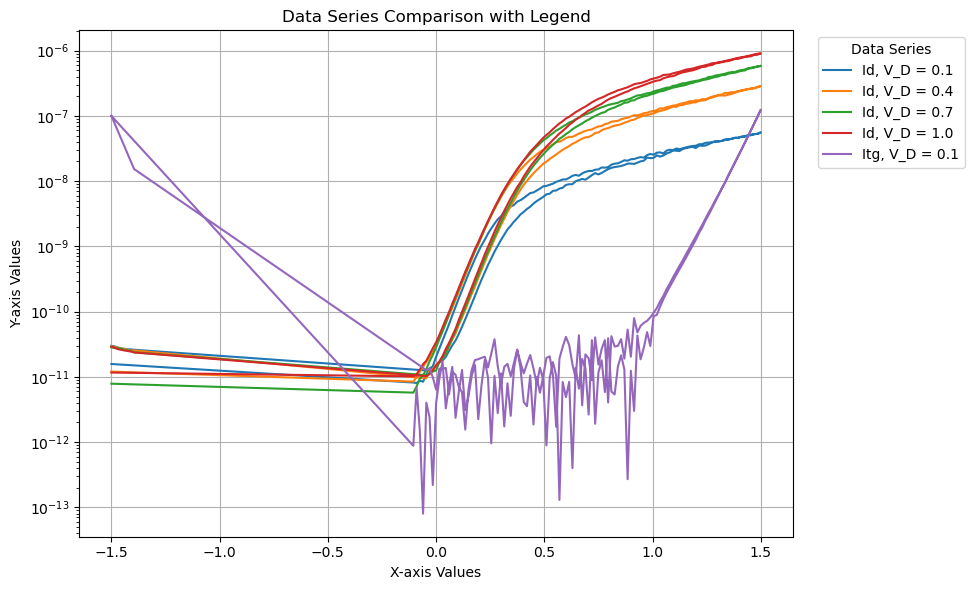

In [13]:
ax = filtered_df.plot(kind='line', figsize=(10, 6))

# 3. Add labels and title
plt.title('Data Series Comparison with Legend')
plt.xlabel('X-axis Values')
plt.ylabel('Y-axis Values')
plt.yscale('log')

# 4. Customize and display the legend
plt.legend(title='Data Series', loc='upper right', bbox_to_anchor=(1.25, 1)) # Example of placing legend outside
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels/legend from overlapping
plt.show()

In [18]:
Vtg = filtered_df.index.to_numpy()
Id_sample = filtered_df['Id, V_D = 1.0'].to_numpy()


In [19]:
def find_first_Id_above_threshold(data_list, threshold):
    try:
        return next(index for index, value in enumerate(data_list) if value > threshold)
    except StopIteration:
        return -1

In [28]:
sigma = 1 # Standard deviation of the Gaussian kernel
smoothed_Id = gaussian_filter1d(Id_sample, sigma)

In [23]:
Id_idx_small = find_first_Id_above_threshold(smoothed_Id,1e-10)
print(f'Vtg = {Vtg[Id_idx_small]}, Id = {smoothed_Id[Id_idx_small]}')
Id_idx_large = find_first_Id_above_threshold(smoothed_Id,1e-9)
print(f'Vtg = {Vtg[Id_idx_large]}, Id = {smoothed_Id[Id_idx_large]}')

Vtg = 0.03, Id = 1.0276219103245697e-10
Vtg = 0.165, Id = 1.2137922275148078e-09


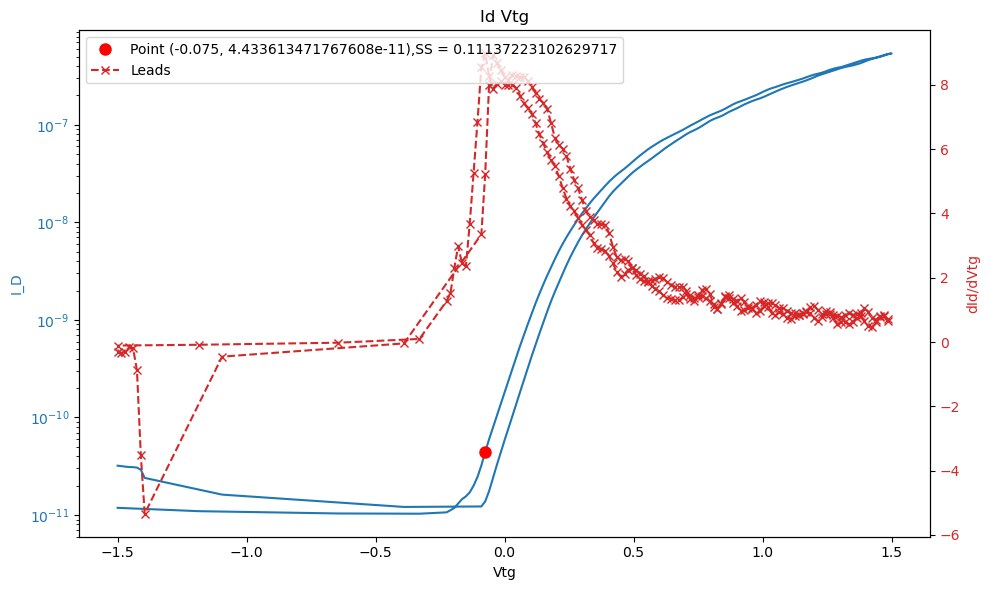

In [29]:

dIdVg = np.gradient(np.log10(smoothed_Id),Vtg)
max_index = np.nanargmax(dIdVg)



fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first dataset on the primary axis
color = 'tab:blue'
ax1.set_xlabel('Vtg')
ax1.set_ylabel('I_D', color=color)
ax1.plot(Vtg,smoothed_Id)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')
ax1.plot(Vtg[max_index], smoothed_Id[max_index], 'o', markersize=8, color='red', label=f'Point ({Vtg[max_index]}, {smoothed_Id[max_index]}),SS = {1/max(dIdVg)}')


# Create a second set of axes that shares the same x-axis
ax2 = ax1.twinx()

# Plot the second dataset on the secondary axis
color = 'tab:red'
ax2.set_ylabel('dId/dVtg', color=color)
ax2.plot(Vtg,dIdVg, color=color, marker='x', linestyle='--', label='Leads')
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim(-1e9,1e9)

# Add a title and legend
plt.title('Id Vtg')
fig.tight_layout() # Adjusts plot to ensure everything fits

# To combine the legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()

In [14]:
SS = 1/max(dIdVg)
Vtg_ss = Vtg[np.nanargmax(dIdVg)]

In [4]:
# For sorting files and plotting in origin

for file in file_list:
    match = re.search(r'[^\\]+$', file)
    if match:
        result = match.group(0)
    print(f'{result} started')
    
    Vbg,df = mo.read_csv_IdVtg_double(file)
    df_reshaped = mo.reshape_table_by_VD_double(df)
    df_sorted = mo.reorder_by_VG_double(df_reshaped,Vbg)

    filename =directory_path + '\\sorted\\' + result
    df_sorted.to_csv(filename, index=True)

R11C2-B__ExfoliatedMoS2_TGIdVg_DoubleGate.csv started
R11C3-B__ExfoliatedMoS2_TGIdVg_DoubleGate.csv started
R11C4-B__ExfoliatedMoS2_TGIdVg_DoubleGate.csv started
R11C5-B__ExfoliatedMoS2_TGIdVg_DoubleGate.csv started
R7C10-B__ExfoliatedMoS2_TGIdVg_DoubleGate.csv started
R7C10-T__ExfoliatedMoS2_TGIdVg_DoubleGate.csv started
R7C11-B__ExfoliatedMoS2_TGIdVg_DoubleGate.csv started
R7C11-T__ExfoliatedMoS2_TGIdVg_DoubleGate.csv started


In [3]:
# For SS calculation

SS_list = []
SS_peak_V = []
name_list = []
Vtg_upper_list = []
Vtg_lower_list = []
Id_upper_list = []
Id_lower_list = []
SS_gradient_list = []
SS_grad_peak_V = []

for file in file_list:
    match = re.search(r'[^\\]+$', file)
    if match:
        result = match.group(0)
    print(f'SS:{result} started')

    name_list.append(result)
    try:
        Vbg,df = mo.read_csv_IdVtg(file)
    except Exception:
        print("File not processed")
        continue
    

    df_reshaped = mo.reshape_table_by_VD_double(df)
    df_sorted = mo.reorder_by_VG_double(df_reshaped,Vbg)
    df_filtered = fs.filter_noise(df_sorted)
    Vtg, smoothed_Id = fs.grab_V_I_0pt1(df_filtered)
    SS,idx_large,idx_small,SS_grad,SS_grad_idx = fs.find_SS(Vtg,smoothed_Id)
    SS_V = Vtg[round((idx_large + idx_small)/2)]
    SS_grad_V = Vtg[SS_grad_idx]

    print(SS)
    SS_list.append(SS)
    SS_gradient_list.append(SS_grad)
    SS_grad_peak_V.append(SS_grad_V)

    Vtg_upper_list.append(Vtg[idx_large])
    Vtg_lower_list.append(Vtg[idx_small])
    Id_upper_list.append(smoothed_Id[idx_large])
    Id_lower_list.append(smoothed_Id[idx_small])

    

    


SS:R11C2-B__ExfoliatedMoS2_TGIdVg_DoubleGate.csv started
Vtg = -0.015, Id = 1.1299725489713961e-10
Vtg = 0.12, Id = 1.0421537980785258e-09
0.135
SS:R11C3-B__ExfoliatedMoS2_TGIdVg_DoubleGate.csv started
Vtg = -0.045, Id = 1.2739872737762792e-10
Vtg = 0.09, Id = 1.0310056536603919e-09
0.135
SS:R11C4-B__ExfoliatedMoS2_TGIdVg_DoubleGate.csv started
Vtg = -0.075, Id = 1.0199130569750538e-10
Vtg = 0.075, Id = 1.0347380902573475e-09
0.15
SS:R11C5-B__ExfoliatedMoS2_TGIdVg_DoubleGate.csv started


c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1307: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1308: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1309: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1315: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1307: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1308: RuntimeWarning: divide by z

Vtg = -0.03, Id = 1.0113614422074642e-10
Vtg = 0.135, Id = 1.1596941018984705e-09
0.165
SS:R7C10-B__ExfoliatedMoS2_TGIdVg_DoubleGate.csv started
Vtg = 0.3, Id = 1.0872143561659618e-10
Vtg = 0.45, Id = 1.002088655709183e-09
0.15000000000000002
SS:R7C10-T__ExfoliatedMoS2_TGIdVg_DoubleGate.csv started
Vtg = 0.285, Id = 1.1187112951462157e-10
Vtg = 0.51, Id = 1.066205691820345e-09
0.22500000000000003
SS:R7C11-B__ExfoliatedMoS2_TGIdVg_DoubleGate.csv started
Vtg = 0.3, Id = 1.1630981696404749e-10
Vtg = 0.495, Id = 1.0136136351102644e-09
0.195
SS:R7C11-T__ExfoliatedMoS2_TGIdVg_DoubleGate.csv started
Vtg = 0.15, Id = 1.1583123399683437e-10
Vtg = 0.315, Id = 1.1155668820679555e-09
0.165
SS:SS_per_file_1_threshold.csv started
File not processed


c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1307: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1308: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1309: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1315: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1307: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1308: RuntimeWarning: divide by z

In [4]:
SS_df = pd.DataFrame(list(zip(name_list, SS_list,SS_gradient_list,SS_grad_peak_V,Vtg_upper_list,Vtg_lower_list,Id_upper_list,Id_lower_list)), columns=['filename', 'SS','SS_grad','SS_grad_pos','Vtg_high','Vtg_low','Id_high','Id_low'])
SS_df.to_csv(f"{directory_path}\\SS_per_file_1_threshold.csv", index=False)